# Imports

In [ ]:
import os, shutil
import pandas as pd
import numpy as np
from PIL import Image
from matplotlib.pyplot import imshow
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load dataset class probabilities

In [ ]:
labels_df = pd.read_csv('/content/drive/MyDrive/Galaxies project/galaxies/training_solutions_rev1.csv')
labels_df.head(50)

,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,Class5.1,Class5.2,Class5.3,Class5.4,Class6.1,Class6.2,Class7.1,Class7.2,Class7.3,Class8.1,Class8.2,Class8.3,Class8.4,Class8.5,Class8.6,Class8.7,Class9.1,Class9.2,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
0,100008,0.383147,0.616853,0.000000,0.000000,0.616853,0.038452,0.578401,0.418398,0.198455,0.000000,0.104752,0.512101,0.000000,0.054453,0.945547,0.201463,0.181684,0.000000,0.000000,0.027226,0.000000,0.027226,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.279952,0.138445,0.000000,0.000000,0.092886,0.000000,0.000000,0.000000,0.325512
1,100023,0.327001,0.663777,0.009222,0.031178,0.632599,0.467370,0.165229,0.591328,0.041271,0.000000,0.236781,0.160941,0.234877,0.189149,0.810851,0.000000,0.135082,0.191919,0.000000,0.000000,0.140353,0.000000,0.048796,0.000000,0.000000,0.012414,0.000000,0.018764,0.000000,0.131378,0.459950,0.000000,0.591328,0.000000,0.000000,0.000000,0.000000
2,100053,0.765717,0.177352,0.056931,0.000000,0.177352,0.000000,0.177352,0.000000,0.177352,0.000000,0.117790,0.059562,0.000000,0.000000,1.000000,0.000000,0.741864,0.023853,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,100078,0.693377,0.238564,0.068059,0.000000,0.238564,0.109493,0.129071,0.189098,0.049466,0.000000,0.000000,0.113284,0.125280,0.320398,0.679602,0.408599,0.284778,0.000000,0.000000,0.000000,0.096119,0.096119,0.000000,0.128159,0.000000,0.000000,0.000000,0.000000,0.094549,0.000000,0.094549,0.189098,0.000000,0.000000,0.000000,0.000000,0.000000
4,100090,0.933839,0.000000,0.066161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.029383,0.970617,0.494587,0.439252,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.029383,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,100122,0.738832,0.238159,0.023009,0.000000,0.238159,0.000000,0.238159,0.000000,0.238159,0.000000,0.000000,0.238159,0.000000,0.197930,0.802070,0.066807,0.663691,0.008335,0.000000,0.000000,0.049482,0.098965,0.049482,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,100123,0.462492,0.456033,0.081475,0.000000,0.456033,0.000000,0.456033,0.000000,0.456033,0.000000,0.000000,0.456033,0.000000,0.687647,0.312353,0.388158,0.074334,0.000000,0.000000,0.000000,0.000000,0.000000,0.213858,0.473789,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,100128,0.687783,0.288344,0.023873,0.000000,0.288344,0.069098,0.219246,0.000000,0.288344,0.067228,0.123625,0.027836,0.069656,0.473888,0.526112,0.482483,0.205300,0.000000,0.000000,0.067766,0.033646,0.000000,0.304710,0.067766,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,100134,0.021834,0.976952,0.001214,0.021751,0.955201,0.313077,0.642124,0.546491,0.408711,0.160096,0.760688,0.034417,0.000000,0.611499,0.388501,0.010917,0.010917,0.000000,0.000000,0.032377,0.064143,0.450225,0.000000,0.032377,0.032377,0.000000,0.000000,0.021751,0.207253,0.152044,0.187194,0.000000,0.000000,0.054649,0.081974,0.081974,0.327894
9,100143,0.269843,0.730157,0.000000,0.730157,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.410635,0.589365,0.000000,0.000000,0.269843,0.000000,0.000000,0.034117,0.000000,0.136878,0.239640,0.000000,0.561429,0.000000,0.168728,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


# Change probabilities to classes

In [ ]:
labels_df['not_galaxy'] = np.where(labels_df['Class1.3']>0.5, 1,0)

labels_df['barred_spiral'] = np.where(labels_df['Class3.1']>0.5, 1, 0)

labels_df['spiral'] = np.where((labels_df['Class4.1']>0.5) & 
                               (labels_df['barred_spiral'] == 0), 
                               1, 0)

labels_df['irregular'] = np.where((labels_df['Class6.1']>0.6) &
                                  (labels_df['barred_spiral'] == 0) &
                                  (labels_df['spiral'] == 0) &
                                  (labels_df['not_galaxy'] == 0), 
                                  1, 0)

labels_df['smooth'] = np.where((labels_df['Class1.1']>labels_df['Class1.2']) & 
                               (labels_df['irregular'] == 0) &
                               (labels_df['not_galaxy'] == 0), 
                               1, 0)

labels_df['edge_on_disk'] = np.where((labels_df['Class2.1']>0.5) & 
                                     (labels_df['irregular'] == 0), 
                                     1, 0)
labels_df['disk'] = np.where((labels_df['Class1.2']>=labels_df['Class1.1']) & 
                             (labels_df['edge_on_disk'] == 0) &
                             (labels_df['irregular']== 0) &
                             (labels_df['spiral'] == 0) &
                             (labels_df['barred_spiral'] == 0) &
                             (labels_df['not_galaxy'] == 0), 
                             1, 0)
labels_df.head(25)

,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,Class5.1,Class5.2,Class5.3,Class5.4,Class6.1,Class6.2,Class7.1,Class7.2,Class7.3,Class8.1,Class8.2,Class8.3,Class8.4,Class8.5,Class8.6,Class8.7,Class9.1,Class9.2,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6,not_galaxy,barred_spiral,spiral,irregular,smooth,edge_on_disk,disk
0,100008,0.383147,0.616853,0.000000,0.000000,0.616853,0.038452,0.578401,0.418398,0.198455,0.000000,0.104752,0.512101,0.000000,0.054453,0.945547,0.201463,0.181684,0.000000,0.000000,0.027226,0.000000,0.027226,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.279952,0.138445,0.000000,0.000000,0.092886,0.000000,0.000000,0.000000,0.325512,0,0,0,0,0,0,1
1,100023,0.327001,0.663777,0.009222,0.031178,0.632599,0.467370,0.165229,0.591328,0.041271,0.000000,0.236781,0.160941,0.234877,0.189149,0.810851,0.000000,0.135082,0.191919,0.000000,0.000000,0.140353,0.000000,0.048796,0.000000,0.000000,0.012414,0.000000,0.018764,0.000000,0.131378,0.459950,0.000000,0.591328,0.000000,0.000000,0.000000,0.000000,0,0,1,0,0,0,0
2,100053,0.765717,0.177352,0.056931,0.000000,0.177352,0.000000,0.177352,0.000000,0.177352,0.000000,0.117790,0.059562,0.000000,0.000000,1.000000,0.000000,0.741864,0.023853,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,1,0,0
3,100078,0.693377,0.238564,0.068059,0.000000,0.238564,0.109493,0.129071,0.189098,0.049466,0.000000,0.000000,0.113284,0.125280,0.320398,0.679602,0.408599,0.284778,0.000000,0.000000,0.000000,0.096119,0.096119,0.000000,0.128159,0.000000,0.000000,0.000000,0.000000,0.094549,0.000000,0.094549,0.189098,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,1,0,0
4,100090,0.933839,0.000000,0.066161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.029383,0.970617,0.494587,0.439252,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.029383,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,1,0,0
5,100122,0.738832,0.238159,0.023009,0.000000,0.238159,0.000000,0.238159,0.000000,0.238159,0.000000,0.000000,0.238159,0.000000,0.197930,0.802070,0.066807,0.663691,0.008335,0.000000,0.000000,0.049482,0.098965,0.049482,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,1,0,0
6,100123,0.462492,0.456033,0.081475,0.000000,0.456033,0.000000,0.456033,0.000000,0.456033,0.000000,0.000000,0.456033,0.000000,0.687647,0.312353,0.388158,0.074334,0.000000,0.000000,0.000000,0.000000,0.000000,0.213858,0.473789,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,1,0,0,0
7,100128,0.687783,0.288344,0.023873,0.000000,0.288344,0.069098,0.219246,0.000000,0.288344,0.067228,0.123625,0.027836,0.069656,0.473888,0.526112,0.482483,0.205300,0.000000,0.000000,0.067766,0.033646,0.000000,0.304710,0.067766,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,1,0,0
8,100134,0.021834,0.976952,0.001214,0.021751,0.955201,0.313077,0.642124,0.546491,0.408711,0.160096,0.760688,0.034417,0.000000,0.611499,0.388501,0.010917,0.010917,0.000000,0.000000,0.032377,0.064143,0.450225,0.000000,0.032377,0.032377,0.000000,0.000000,0.021751,0.207253,0.152044,0.187194,0.000000,0.000000,0.054649,0.081974,0.081974,0.327894,0,0,1,0,0,0,0
9,100143,0.269843,0.730157,0.000000,0.730157,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.410635,0.589365,0.000000,0.000000,0.269843,0.000000,0.000000,0.034117,0.000000,0.136878,0.239640,0.000000,0.561429,0.000000,0.168728,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,1,0


In [ ]:
new_labels_df = labels_df[['GalaxyID','not_galaxy','barred_spiral','spiral','irregular','smooth','edge_on_disk','disk']]
new_labels_df['GalaxyID'] = new_labels_df['GalaxyID'].apply(str)+'.jpg'

name = {'GalaxyID':'filename'}

new_labels_df = new_labels_df.rename(columns = name)
new_labels_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,filename,not_galaxy,barred_spiral,spiral,irregular,smooth,edge_on_disk,disk
0,100008.jpg,0,0,0,0,0,0,1
1,100023.jpg,0,0,1,0,0,0,0
2,100053.jpg,0,0,0,0,1,0,0
3,100078.jpg,0,0,0,0,1,0,0
4,100090.jpg,0,0,0,0,1,0,0


## Save new class labels

In [ ]:
new_labels_df.to_csv('classes.csv', index = False)

In [ ]:
classes_df = pd.read_csv('/content/drive/MyDrive/Galaxies project/galaxies/images_training_rev1/classes.csv')
classes_df.head()

,filename,not_galaxy,barred_spiral,spiral,irregular,smooth,edge_on_disk,disk
0,100008.jpg,0,0,0,0,0,0,1
1,100023.jpg,0,0,1,0,0,0,0
2,100053.jpg,0,0,0,0,1,0,0
3,100078.jpg,0,0,0,0,1,0,0
4,100090.jpg,0,0,0,0,1,0,0


## Auto-sort images into their class folders

In [ ]:
PATH = '/content/drive/MyDrive/Galaxies project/galaxies/images_training_rev1/'

In [ ]:
for i in range(classes_df.shape[0]):
  filename = classes_df.iloc[i][0]
  for col in classes_df.iloc[i].index:
    if classes_df.iloc[i][col] == 1:
      try:
        shutil.move(PATH+filename, PATH+col+'/'+filename)
      except:
        pass
      break

# Augment images

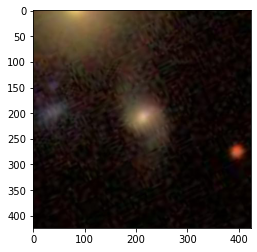

In [ ]:
filename = 'barred_spiral/101074.jpg'
with Image.open(PATH+filename) as im:

    # Rotate the image by 60 degrees counter clockwise
    # Angle is in degrees counter clockwise
    im.rotate(270)
    imshow(np.asarray(im.rotate(90)))